In [3]:
import os

os.listdir("../data/crime")

['2022년.csv',
 '2011년.csv',
 '2015년.csv',
 '2001년.csv',
 '2002년.csv',
 '2004년.csv',
 'seoul_sexual_map.html',
 '2007년.csv',
 '2009년.csv',
 '2023년.csv',
 '2017년.csv',
 '2010년.csv',
 'seoul_arrest_rate.png',
 '2020년.csv',
 '2019년.csv',
 '2021년.csv',
 '2006년.csv',
 '2000년.csv',
 'seoul_crime_rate.png',
 '2018년.csv',
 'seoul_crime_result.csv',
 'seoul_murder_map.html',
 '2003년.csv',
 '2008년.csv',
 '2005년.csv',
 '2014년.csv',
 '2016년.csv',
 '2012년.csv',
 '2013년.csv']

In [4]:
from glob import glob

glob("../data/crime/*")

['../data/crime/2022년.csv',
 '../data/crime/2011년.csv',
 '../data/crime/2015년.csv',
 '../data/crime/2001년.csv',
 '../data/crime/2002년.csv',
 '../data/crime/2004년.csv',
 '../data/crime/seoul_sexual_map.html',
 '../data/crime/2007년.csv',
 '../data/crime/2009년.csv',
 '../data/crime/2023년.csv',
 '../data/crime/2017년.csv',
 '../data/crime/2010년.csv',
 '../data/crime/seoul_arrest_rate.png',
 '../data/crime/2020년.csv',
 '../data/crime/2019년.csv',
 '../data/crime/2021년.csv',
 '../data/crime/2006년.csv',
 '../data/crime/2000년.csv',
 '../data/crime/seoul_crime_rate.png',
 '../data/crime/2018년.csv',
 '../data/crime/seoul_crime_result.csv',
 '../data/crime/seoul_murder_map.html',
 '../data/crime/2003년.csv',
 '../data/crime/2008년.csv',
 '../data/crime/2005년.csv',
 '../data/crime/2014년.csv',
 '../data/crime/2016년.csv',
 '../data/crime/2012년.csv',
 '../data/crime/2013년.csv']

In [5]:
target_path = "../data/crime/"
file_list = glob(target_path + "20*.csv")
file_list

['../data/crime/2022년.csv',
 '../data/crime/2011년.csv',
 '../data/crime/2015년.csv',
 '../data/crime/2001년.csv',
 '../data/crime/2002년.csv',
 '../data/crime/2004년.csv',
 '../data/crime/2007년.csv',
 '../data/crime/2009년.csv',
 '../data/crime/2023년.csv',
 '../data/crime/2017년.csv',
 '../data/crime/2010년.csv',
 '../data/crime/2020년.csv',
 '../data/crime/2019년.csv',
 '../data/crime/2021년.csv',
 '../data/crime/2006년.csv',
 '../data/crime/2000년.csv',
 '../data/crime/2018년.csv',
 '../data/crime/2003년.csv',
 '../data/crime/2008년.csv',
 '../data/crime/2005년.csv',
 '../data/crime/2014년.csv',
 '../data/crime/2016년.csv',
 '../data/crime/2012년.csv',
 '../data/crime/2013년.csv']

In [10]:
import pandas as pd
import numpy as np

crime_station_t = []

for each_file in file_list:
    crime_raw_data = pd.read_csv(each_file, usecols=[0, 1, 2, 3], encoding="euc-kr")

    crime_raw_data["죄종"] = crime_raw_data["죄종"].replace("강간,추행", "강간")

    crime_station = crime_raw_data.pivot_table(
        crime_raw_data, index=["구분"], columns=["죄종", "발생검거"], aggfunc="sum"
    )

    crime_station.columns = [
        "강간검거",
        "강간",
        "강도검거",
        "강도",
        "살인검거",
        "살인",
        "절도검거",
        "절도",
        "폭력검거",
        "폭력"
    ]

    crime_station["year"] = each_file.split("/")[-1][:4]

    crime_station.reset_index(inplace=True)
    crime_station_t.append(crime_station)

In [11]:
crime_total = pd.concat(crime_station_t)
crime_total.head()

,구분,강간검거,강간,강도검거,강도,살인검거,살인,절도검거,절도,폭력검거,폭력,year
0,강남,359.0,458.0,8.0,9.0,5.0,6.0,654.0,1565.0,2178.0,2494.0,2022
1,강동,134.0,157.0,5.0,5.0,6.0,5.0,900.0,1672.0,1599.0,1872.0,2022
2,강북,147.0,177.0,6.0,5.0,4.0,5.0,589.0,872.0,1597.0,1773.0,2022
3,강서,195.0,261.0,7.0,7.0,3.0,3.0,1185.0,1991.0,2201.0,2401.0,2022
4,관악,279.0,327.0,8.0,9.0,8.0,10.0,1050.0,1966.0,2066.0,2567.0,2022


In [12]:
crime_total_murder = crime_total.pivot(index="year", columns="구분", values="살인")
crime_total_murder

구분,강남,강동,강북,강서,관악,광진,구로,금천,남대문,노원,...,수서,양천,영등포,용산,은평,종로,종암,중랑,중부,혜화
year,,,,,,,,,,,,,,,,,,,,,
2000,3.0,12.0,9.0,6.0,8.0,2.0,10.0,10.0,3.0,3.0,...,3.0,5.0,6.0,5.0,2.0,4.0,8.0,13.0,1.0,3.0
2001,13.0,9.0,6.0,16.0,3.0,14.0,4.0,13.0,6.0,8.0,...,4.0,8.0,7.0,3.0,6.0,3.0,10.0,16.0,0.0,4.0
2002,3.0,6.0,7.0,8.0,8.0,12.0,4.0,16.0,2.0,7.0,...,7.0,6.0,3.0,2.0,3.0,0.0,5.0,8.0,1.0,4.0
2003,7.0,6.0,9.0,5.0,4.0,6.0,6.0,15.0,2.0,3.0,...,5.0,7.0,8.0,14.0,5.0,3.0,2.0,11.0,0.0,5.0
2004,8.0,7.0,15.0,8.0,0.0,10.0,13.0,16.0,1.0,5.0,...,6.0,6.0,5.0,8.0,5.0,1.0,7.0,7.0,2.0,7.0
2005,8.0,5.0,10.0,10.0,5.0,16.0,10.0,14.0,1.0,10.0,...,5.0,12.0,4.0,9.0,7.0,3.0,6.0,14.0,2.0,2.0
2006,5.0,4.0,5.0,16.0,5.0,7.0,16.0,5.0,2.0,6.0,...,4.0,5.0,12.0,9.0,3.0,7.0,6.0,11.0,4.0,5.0
2007,8.0,7.0,12.0,4.0,13.0,8.0,19.0,6.0,0.0,11.0,...,4.0,8.0,13.0,9.0,6.0,5.0,8.0,13.0,4.0,2.0
2008,10.0,8.0,7.0,18.0,10.0,3.0,22.0,3.0,1.0,3.0,...,3.0,11.0,19.0,7.0,7.0,5.0,5.0,7.0,4.0,3.0


In [13]:
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

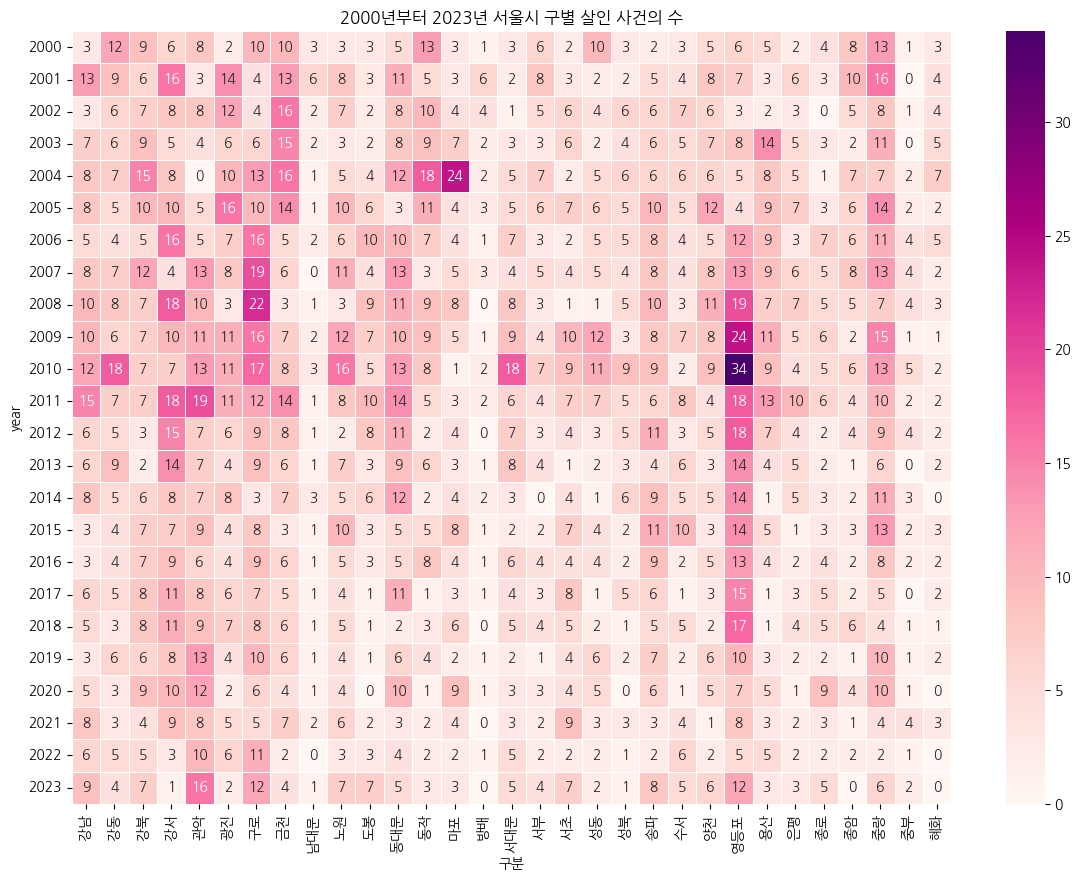

In [20]:
plt.figure(figsize=(13, 10))
sns.heatmap(crime_total_murder, annot=True, linewidths=0.5, cmap="RdPu")
plt.title("2000년부터 2023년 서울시 구별 살인 사건의 수")
plt.autoscale()
plt.tight_layout(pad=5)
plt.savefig("../data/crime/seoul_year_murder_graph.png")
plt.show()

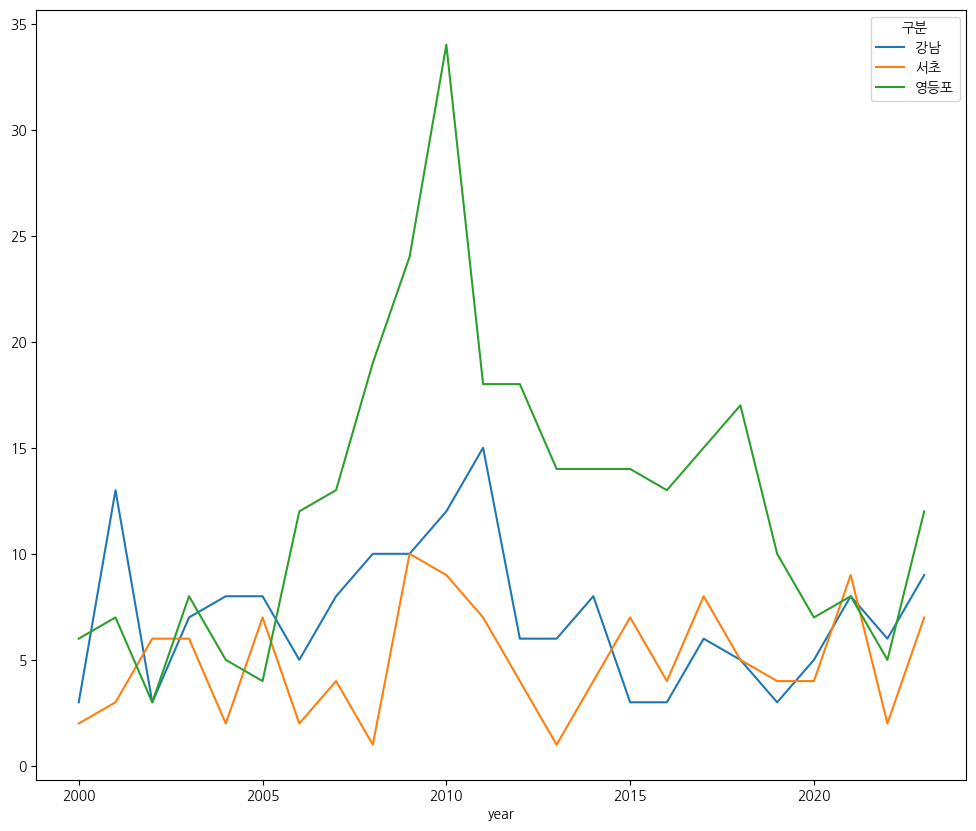

In [21]:
crime_total_murder[["강남", "서초", "영등포"]].plot(figsize=(12, 10))
plt.savefig("../data/crime/seoul_year_murder_change_graph.png")
plt.show()

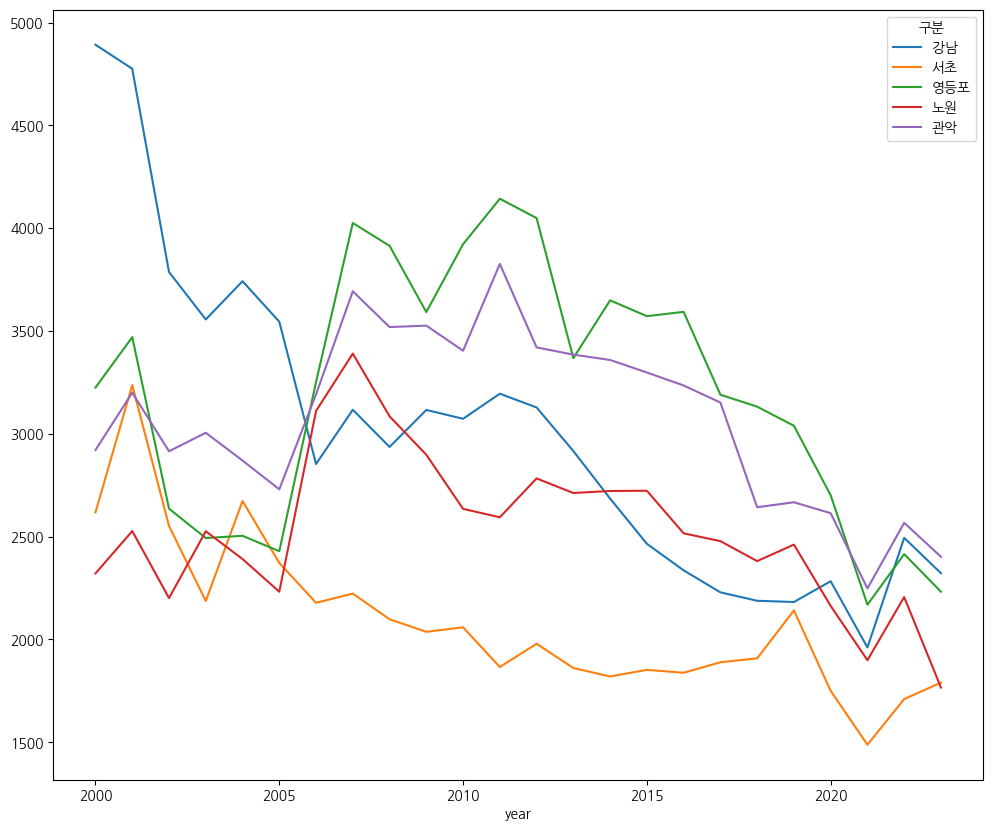

In [22]:
crime_total_violence = crime_total.pivot(index="year", columns="구분", values="폭력")
crime_total_violence[["강남", "서초", "영등포", "노원", "관악"]].plot(figsize=(12, 10))
plt.savefig("../data/crime/seoul_year_violence_change_graph.png")
plt.show()

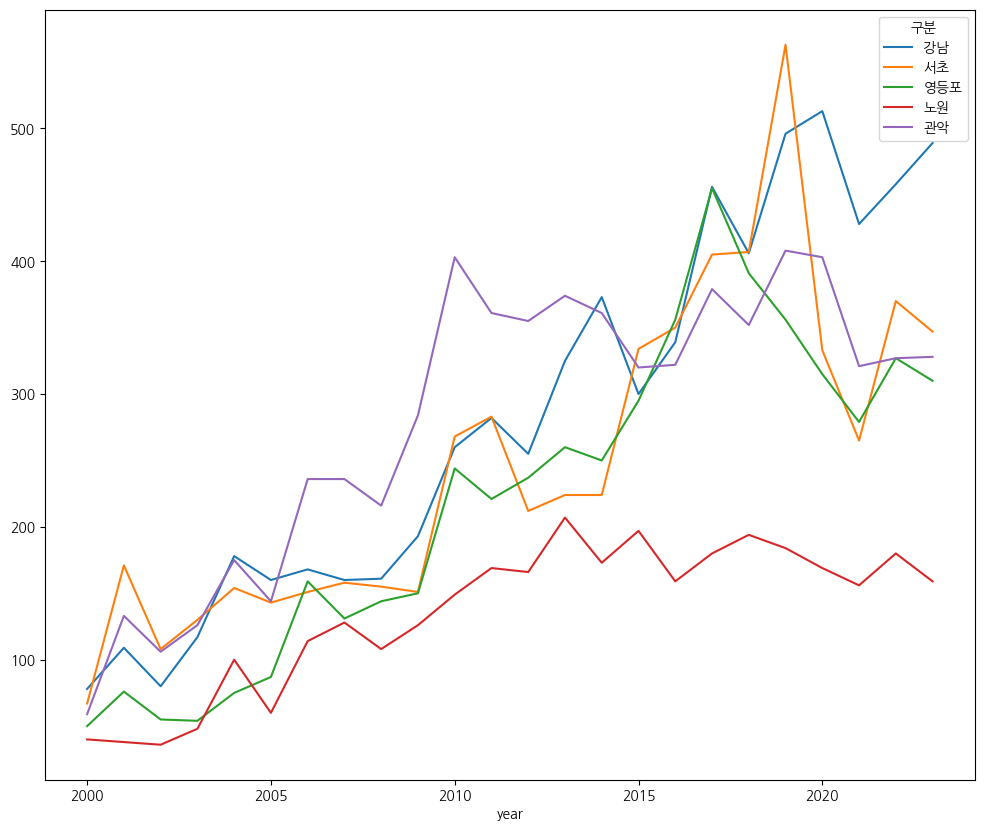

In [24]:
crime_total_sexual = crime_total.pivot(index="year", columns="구분", values="강간")
crime_total_sexual[["강남", "서초", "영등포", "노원", "관악"]].plot(figsize=(12, 10))
plt.savefig("../data/crime/seoul_year_sexual_change_graph.png")
plt.show()